In [262]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import linalg as LA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from factor_analyzer import FactorAnalyzer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# 1. PCA (not library using)

In [7]:
data1 = pd.read_csv('./data/PCAdata.csv')
data1.head()

,V1,V2,V3,V4
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


## (1) 표본상관행렬

In [12]:
corr = data1.corr()
corr

,V1,V2,V3,V4
V1,1.000000,0.801873,0.069573,0.563579
V2,0.801873,1.000000,0.258872,0.665241
V3,0.069573,0.258872,1.000000,0.411341
V4,0.563579,0.665241,0.411341,1.000000


## (2) 주성분, 주성분 별 변동성

In [90]:
X = StandardScaler().fit_transform(data1.to_numpy()).T

In [91]:
cov = np.cov(X) # Sigma

In [92]:
l = LA.eig(cov)[1]

### 주성분

In [139]:
y = l.T @ X
y

array([[ 9.85565885e-01,  1.95013775e+00,  1.76316354e+00,
        -1.41420290e-01,  2.52398013e+00,  1.51456286e+00,
        -1.35864746e+00,  4.77093091e-02,  3.01304227e+00,
         1.63928304e+00, -9.12657146e-01, -1.63979985e+00,
         1.37891072e+00, -5.05461361e-01, -2.25364607e+00,
        -7.96881121e-01, -7.50859074e-01,  1.56481798e+00,
        -2.39682949e+00,  1.76336939e+00, -4.86166287e-01,
         2.10844115e+00, -1.69268181e+00,  9.96494459e-01,
         6.96787329e-01, -1.18545191e+00, -1.26563654e+00,
         2.87439454e+00, -2.38391541e+00,  1.81566110e-01,
         1.98002375e+00,  1.68257738e+00,  1.12337861e+00,
        -2.99222562e+00, -2.25965422e-01, -3.11782855e-01,
         5.91220768e-02, -8.88415824e-01, -8.63772064e-01,
         1.32072380e+00, -1.98777484e+00,  9.99741684e-01,
         1.35513821e+00, -5.50565262e-01, -2.80141174e+00,
        -9.63349112e-02, -2.16903379e-01, -2.10858541e+00,
        -2.07971417e+00, -6.29426664e-01],
       [ 1.13

### 각 주성분 별 변동성

In [140]:
np.std(y, axis = 1) # 3번째와 4번째 PC 순서 바꾸어서 고려해야함.

array([1.57487827, 0.99486941, 0.41644938, 0.59712912])

## (3)

In [141]:
(LA.eig(cov)[0]/LA.eig(cov)[0].sum())[:2]

array([0.62006039, 0.24744129])

### 첫 두개의 주성분의 설명 정도 (86.75%)

In [142]:
(LA.eig(cov)[0]/LA.eig(cov)[0].sum())[:2].sum()

0.8675016829223339

## (4)

In [120]:
pc1 = principal_component[0]
pc2 = principal_component[1]

Text(0.5, 0, 'PC1')

Text(0, 0.5, 'PC2')

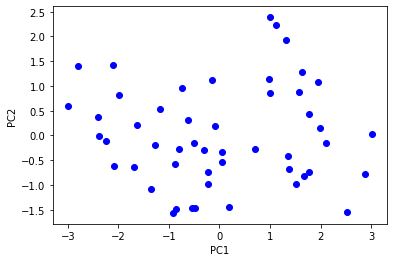

In [162]:
plt.scatter(pc1, pc2, color = 'blue')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

## (5)

array([ 0.53589947,  0.41818087,  0.6492278 , -0.34123273])

<Figure size 432x360 with 0 Axes>

Text(0.5, 1.0, '1st PC loadings')

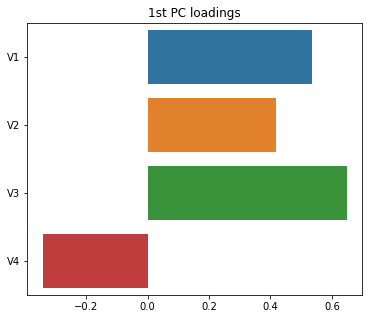

In [167]:
l[0]
plt.figure(figsize = (6, 5))
plt.title('1st PC loadings')
sns.barplot(x = l[0], y = data1.columns)
plt.show()

- 위와 같은 비율로 V1, V2, V3, V4가 영향을 미친다. 주성분은 eigen vector와 기존 데이터의 행렬곱으로 구성되기 때문이다.

array([ 0.58318363,  0.1879856 , -0.74340748, -0.26814843])

<Figure size 432x360 with 0 Axes>

Text(0.5, 1.0, '2nd PC loadings')

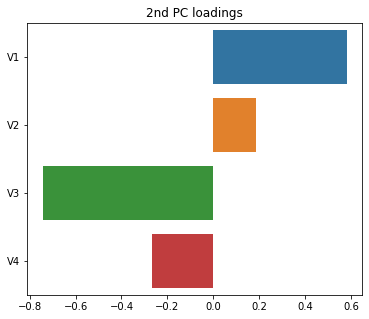

In [168]:
l[1]
plt.figure(figsize = (6, 5))
plt.title('2nd PC loadings')
sns.barplot(x = l[1], y = data1.columns)
plt.show()

- 위와 같은 비율로 V1, V2, V3, V4가 영향을 미친다. 주성분은 eigen vector와 기존 데이터의 행렬곱으로 구성되기 때문이다.

# 2. 잠재요인

In [169]:
data2 = pd.read_csv('./data/mutfunds.csv')
data2.head()

,MF1,MF2,MF3,MF4,MF5,MF6,MF7,MF8,MF9,MF10,MF11,MF12,MF13,MF14,MF15,IRATE,MINDEX
0,48.25,7.59,9.01,9.66,13.10,17.04,12.24,7.95,2.38,5.35,15.40,9.11,31.93,5.65,7.60,0.0833,3028.20
1,47.18,7.37,8.75,9.55,12.64,16.70,12.14,7.57,2.36,5.37,15.01,8.89,31.10,5.64,7.42,0.0835,2999.04
2,48.54,7.45,8.92,9.88,13.07,17.15,12.30,7.75,2.37,5.45,15.32,9.08,31.40,5.78,7.66,0.0830,3038.89
3,48.84,7.41,8.88,9.75,13.13,17.36,12.37,7.72,2.36,5.54,14.91,9.18,31.43,5.82,7.73,0.0824,3046.80
4,48.85,7.50,8.85,9.87,11.14,17.54,12.17,7.82,2.19,5.52,12.10,7.90,30.60,5.59,7.30,0.0823,3067.78


# (1)

In [201]:
number_of_factors = 4
fa = FactorAnalyzer(n_factors = number_of_factors, rotation = None, method = 'principal')
fa.fit(data2)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='principal', n_factors=4, rotation=None,
               rotation_kwargs={}, use_smc=True)

In [203]:
fa.get_communalities()

array([0.97741105, 0.9315053 , 0.99401956, 0.98728094, 0.98537946,
       0.97980023, 0.98127806, 0.98975157, 0.97829289, 0.97515093,
       0.9590724 , 0.99687532, 0.99337208, 0.9866441 , 0.9905657 ,
       0.96956485, 0.99174706])

In [204]:
fa.get_factor_variance()

(array([12.73590001,  2.79127533,  0.91773918,  0.22279698]),
 array([0.74917059, 0.16419267, 0.05398466, 0.0131057 ]),
 array([0.74917059, 0.91336326, 0.96734791, 0.98045362]))

### 74.917% 정도 설명된다.

## (2)

In [205]:
pd.DataFrame(fa.loadings_.round(decimals=2), index = data2.columns, 
             columns = ['Factor' + ' ' + str(i) for i in range(number_of_factors)])

,Factor 0,Factor 1,Factor 2,Factor 3
MF1,0.95,0.22,-0.11,-0.12
MF2,0.85,-0.46,-0.03,0.04
MF3,0.99,0.05,-0.03,0.06
MF4,0.99,-0.05,-0.10,-0.03
MF5,0.71,-0.64,0.20,-0.21
MF6,0.79,0.59,-0.08,-0.03
MF7,0.69,0.71,0.03,0.04
MF8,0.98,0.10,-0.04,0.13
MF9,0.93,0.28,0.16,-0.04
MF10,0.95,-0.13,-0.15,0.18


### 위 그림을 참고했을 때, (Factor 0, MINDEX) 위치의 값이 높은 것으로 보아, Index를 추종하는 펀드의 부분이 될 것 같다.

## (3)

### 당연히 추가적인 잠재 요인은 존재한다. 이는 위 그림의 Factor 1이나 2가 될 수 있을 것 같은데, 의미를 따지자면, 이자율과 관련된 Factor일 것이다.

# 3.

In [301]:
data3 = pd.read_csv('./data/ldadata.csv')
data3.head()

,Y,X1,X2,X3,X4,X5
0,1,36.7,62.8,-89.5,54.1,1.7
1,1,24.0,3.3,-3.5,20.9,1.1
2,1,-61.6,-120.8,-103.2,24.7,2.5
3,1,-1.0,-18.1,-28.8,36.2,1.1
4,1,18.9,-3.8,-50.6,26.4,0.9


In [305]:
data3_x = data3.iloc[:,1:]
data3_y = data3.iloc[:,0]

In [306]:
data3_x.iloc[:,:] = StandardScaler().fit_transform(data3_x)
data3_x_1 = data3_x[data3['Y'] == 1] # 도산
data3_x_2 = data3_x[data3['Y'] == 2] # 정상운영

## (1) 선형판별함수(Fisher) = y

In [307]:
S = (4*data3_x_1.cov() + 4 * data3_x_2.cov())/8
S

,X1,X2,X3,X4,X5
X1,0.664536,0.395497,0.227722,0.240123,-0.082130
X2,0.395497,0.742800,0.069558,0.115678,0.035432
X3,0.227722,0.069558,0.538391,0.050280,-0.080571
X4,0.240123,0.115678,0.050280,0.769595,0.068784
X5,-0.082130,0.035432,-0.080571,0.068784,0.845233


In [308]:
l = (data3_x_1.mean() - data3_x_2.mean()).T @ np.linalg.inv(S)

In [309]:
y = data3_x @ l
y

0      5.255883
1      0.667491
2     10.155449
3      3.246924
4      4.682753
5      6.312913
6      2.586288
7      7.126705
8      0.573757
9      3.983706
10     3.652963
11     0.913164
12     1.250247
13    -2.277349
14    -3.120519
15    -1.680163
16    -3.232893
17    -4.489321
18    -2.945580
19    -4.622952
20    -2.946348
21    -6.434614
22    -9.256252
23    -1.468405
24    -3.398612
25    -4.167727
26     0.857267
27    -1.344640
28     0.119867
dtype: float64

In [310]:
m_hat = 0.5 * l.T @ (data3_x_1.mean() + data3_x_2.mean())
m_hat

0.3635209749810377

## (2)

In [312]:
lda = LDA(n_components = 1, solver = 'eigen')
X_new = lda.fit_transform(data3_x, data3_y)

array([[-2.08233112],
       [-0.18074316],
       [-4.22649728],
       [-1.2502402 ],
       [-1.80948455],
       [-2.55936761],
       [-0.96266364],
       [-2.86721113],
       [-0.1260669 ],
       [-1.62341041],
       [-1.4487642 ],
       [-0.37938462],
       [-0.44222334],
       [ 0.99424284],
       [ 1.28245118],
       [ 0.62054907],
       [ 1.34365055],
       [ 1.67591626],
       [ 1.1477654 ],
       [ 1.77735344],
       [ 1.26426922],
       [ 2.46346868],
       [ 3.3978844 ],
       [ 0.62744005],
       [ 1.44538287],
       [ 1.5570068 ],
       [-0.26909725],
       [ 0.61577028],
       [ 0.0143344 ]])

In [313]:
X_new = X_new.reshape(-1)
X_new_1 = X_new[:13]
X_new_2 = X_new[13:]

Text(0.5, 1.0, 'X_new When y = 1')

(array([1., 0., 0., 1., 1., 2., 2., 2., 0., 4.]),
 array([-4.22649728, -3.81645424, -3.40641121, -2.99636817, -2.58632513,
        -2.17628209, -1.76623905, -1.35619601, -0.94615298, -0.53610994,
        -0.1260669 ]),
 <a list of 10 Patch objects>)

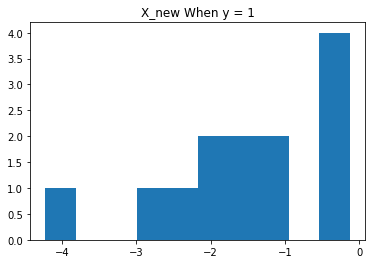

In [316]:
plt.title('X_new When y = 1')
plt.hist(X_new_1, color = 'blue')
plt.show()

Text(0.5, 1.0, 'X_new When y = 2')

(array([2., 0., 3., 2., 5., 2., 0., 1., 0., 1.]),
 array([-0.26909725,  0.09760091,  0.46429908,  0.83099724,  1.19769541,
         1.56439357,  1.93109174,  2.2977899 ,  2.66448807,  3.03118623,
         3.3978844 ]),
 <a list of 10 Patch objects>)

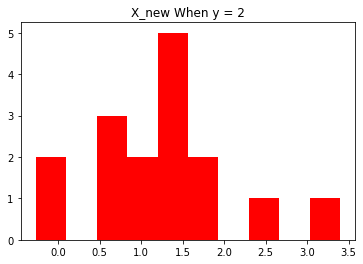

In [318]:
plt.title('X_new When y = 2')
plt.hist(X_new_2, color = 'red')
plt.show()

Text(0.5, 1.0, 'X_new When y = 1')

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb9b1cf28d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb9b1cff048>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb9b1cf2780>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb9b1cff6d8>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb9b1cffa20>],
 'means': []}

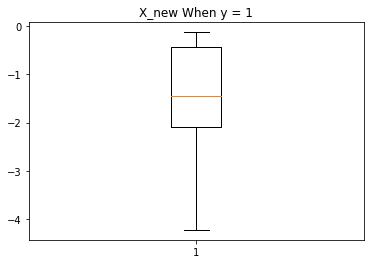

In [322]:
plt.title('X_new When y = 1')
plt.boxplot(X_new_1)
plt.show()

Text(0.5, 1.0, 'X_new When y = 2')

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb9b1d48d68>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb9b1d56470>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb9b1d48c18>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb9b1d56b00>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb9b1d56e48>],
 'means': []}

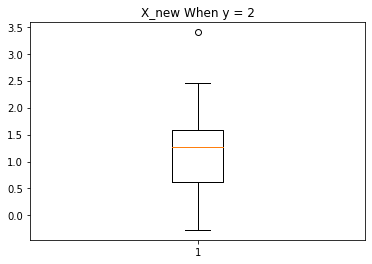

In [323]:
plt.title('X_new When y = 2')
plt.boxplot(X_new_2)
plt.show()